# Solar Wind investigation + Classification algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt    

## Data Cleaning and exploration

In [2]:
df = pd.read_csv('solar_wind.csv')
df.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [3]:
df.drop([
    'bx_gsm',
    'by_gsm',
    'bz_gsm',
    'density',
    'source',
    'temperature',
    'phi_gsm',
    'theta_gse',
    'phi_gse',
    'theta_gsm',
    'bt',
    'speed'],errors='ignore', axis=1, inplace=True)

In [4]:
df.shape


(8392320, 5)

In [5]:
train_a = df.loc[df['period'] == 'train_a']
train_a.shape

(1729440, 5)

### Drop missing values

In [6]:
clean_train_a = train_a.dropna()

In [7]:
train_a = df.loc[df['period'] == 'train_a']
train_a['bx_gse'].max()


np.float64(41.13)

Interquartile Range

In [8]:
higher_q = clean_train_a['bx_gse'].quantile(0.75)
lower_q = clean_train_a['bx_gse'].quantile(0.25)
iqr = higher_q - lower_q

In [9]:
higher_q + (1.5 * iqr)

np.float64(11.315000000000001)

In [10]:
standard_deviation = train_a['bx_gse'].std()
lower_threshold = standard_deviation * -3
higher_threshold = standard_deviation * 3
lower_threshold

np.float64(-13.017637037916273)

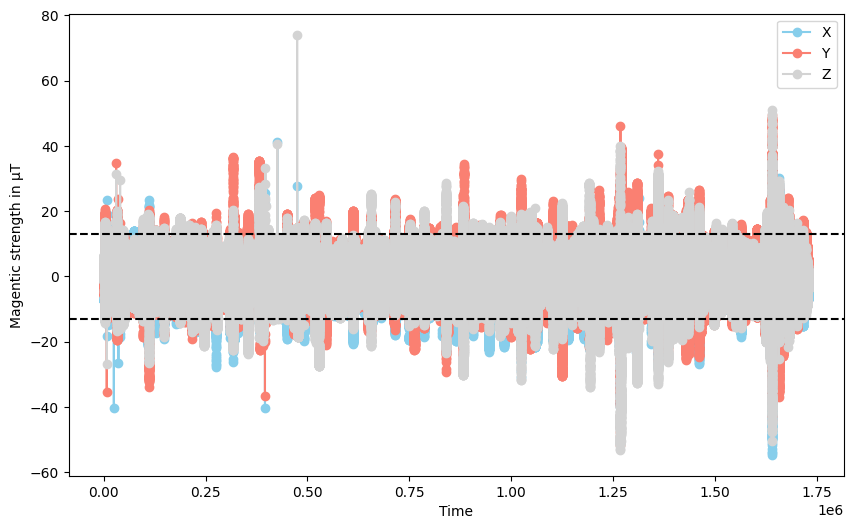

In [11]:
fig, ax = plt.subplots(figsize=(10,6))


ax.plot(clean_train_a.index, clean_train_a['bx_gse'], color= 'skyblue', marker = 'o', label='X')
ax.plot(clean_train_a.index, clean_train_a['by_gse'], color='salmon', marker='o', label='Y')
ax.plot(clean_train_a.index, clean_train_a['bz_gse'], color = 'lightgray', marker='o', label='Z')

ax.axhline(y=higher_threshold, color='black', linestyle='dashed')
ax.axhline(y=lower_threshold, color='black', linestyle = 'dashed')


ax.set_xlabel('Time')
ax.set_ylabel('Magentic strength in μT')


ax.legend()
plt.savefig('plot.png')


### Feature Engineering

In [12]:
filtered_train_a = clean_train_a.dropna()
filtered_train_a.shape

(1575012, 5)

In [13]:
filtered_train_a['Magnitude'] = ((filtered_train_a['bx_gse']**2) + (filtered_train_a['by_gse'] ** 2) + (filtered_train_a['bz_gse'] ** 2)) ** 0.5
filtered_train_a.head()

,period,timedelta,bx_gse,by_gse,bz_gse,Magnitude
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,6.431563
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,6.518504
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,6.374998
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.406622
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,6.324310


In [14]:
standard_deviation = filtered_train_a['Magnitude'].std()
lower_threshold = standard_deviation * -3
higher_threshold = standard_deviation * 3
lower_threshold

np.float64(-11.095575517411561)

In [15]:
#clean_train_a['Irregular_Activity'] = (clean_train_a['bx_gse'] > higher_q + (1.5*iqr) ) | (clean_train_a['bx_gse'] < lower_q - (1.5 * iqr) )
filtered_train_a['Irregular_Activity'] = (filtered_train_a['Magnitude'] > higher_threshold) | (filtered_train_a['Magnitude'] < lower_threshold)
filtered_train_a.loc[filtered_train_a['Irregular_Activity'] == True, ['Magnitude']]

,Magnitude
2152,11.106169
2153,11.344342
2154,11.424977
2155,11.228860
2162,11.149215
...,...
1723454,11.636713
1723455,11.438007
1723456,11.190304
1723573,11.096819


In [23]:
filtered_train_a['filtered_x'] = clean_train_a['bx_gse']

In [24]:
filtered_train_a.loc[filtered_train_a['Irregular_Activity'] == True]

,period,timedelta,bx_gse,by_gse,bz_gse,Magnitude,Irregular_Activity,filtered_x
2152,train_a,1 days 11:52:00,2.58,-8.15,-7.09,11.106169,True,2.58
2153,train_a,1 days 11:53:00,1.86,-8.43,-7.36,11.344342,True,1.86
2154,train_a,1 days 11:54:00,1.69,-9.42,-6.24,11.424977,True,1.69
2155,train_a,1 days 11:55:00,3.19,-9.46,-5.14,11.228860,True,3.19
2162,train_a,1 days 12:02:00,3.91,-6.85,-7.88,11.149215,True,3.91
...,...,...,...,...,...,...,...,...
1723454,train_a,1196 days 20:14:00,-8.59,6.95,-3.65,11.636713,True,-8.59
1723455,train_a,1196 days 20:15:00,-8.52,6.90,-3.26,11.438007,True,-8.52
1723456,train_a,1196 days 20:16:00,-7.50,7.40,-3.77,11.190304,True,-7.50
1723573,train_a,1196 days 22:13:00,1.72,10.01,-4.47,11.096819,True,1.72


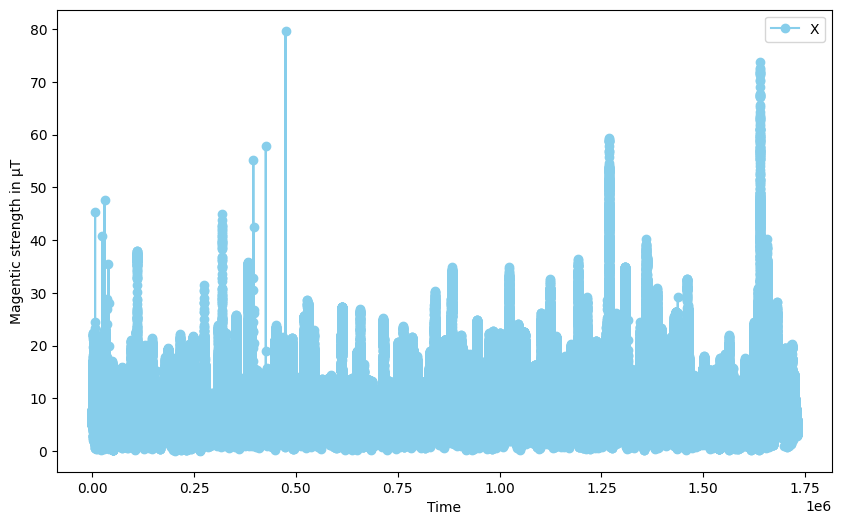

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

mag_high_thresh = 3 * filtered_train_a['Magnitude'] 


ax.plot(filtered_train_a.index, filtered_train_a['Magnitude'], color= 'skyblue', marker = 'o', label='X')





ax.set_xlabel('Time')
ax.set_ylabel('Magentic strength in μT')


ax.legend()
plt.savefig('plot.png')

# Main dataset - Logistic Regression Training

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [20]:
filtered_train_a.head()

,period,timedelta,bx_gse,by_gse,bz_gse,Magnitude,Irregular_Activity
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,6.431563,False
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,6.518504,False
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,6.374998,False
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.406622,False
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,6.324310,False


In [26]:
main_dataset = filtered_train_a.drop(['period', 'bx_gse'], axis=1)
main_dataset = main_dataset.dropna()
main_dataset.head()

,timedelta,by_gse,bz_gse,Magnitude,Irregular_Activity,filtered_x
0,0 days 00:00:00,3.00,1.25,6.431563,False,-5.55
1,0 days 00:01:00,3.16,1.17,6.518504,False,-5.58
2,0 days 00:02:00,3.66,0.85,6.374998,False,-5.15
3,0 days 00:03:00,3.68,0.68,6.406622,False,-5.20
4,0 days 00:04:00,3.68,0.49,6.324310,False,-5.12


In [27]:
main_dataset['filtered_x'].max()

np.float64(41.13)

## Data Preprocesing

In [28]:
def duration_to_minutes(duration_str):
    days_part, time_part = duration_str.split(" days ")
    days = int(days_part)
    hours, minutes, seconds = map(int, time_part.split(":"))
    return days * 24 * 60 + hours * 60 + minutes + seconds // 60


main_dataset['minutes'] = df['timedelta'].apply(duration_to_minutes)
main_dataset = main_dataset.drop(['timedelta'], axis=1)
main_dataset.head()



,by_gse,bz_gse,Magnitude,Irregular_Activity,filtered_x,minutes
0,3.00,1.25,6.431563,False,-5.55,0
1,3.16,1.17,6.518504,False,-5.58,1
2,3.66,0.85,6.374998,False,-5.15,2
3,3.68,0.68,6.406622,False,-5.20,3
4,3.68,0.49,6.324310,False,-5.12,4


In [29]:
main_dataset.head()

,by_gse,bz_gse,Magnitude,Irregular_Activity,filtered_x,minutes
0,3.00,1.25,6.431563,False,-5.55,0
1,3.16,1.17,6.518504,False,-5.58,1
2,3.66,0.85,6.374998,False,-5.15,2
3,3.68,0.68,6.406622,False,-5.20,3
4,3.68,0.49,6.324310,False,-5.12,4


In [30]:
X = main_dataset[['filtered_x', 'Magnitude', 'minutes', 'by_gse', 'bz_gse']]
y = main_dataset['Irregular_Activity']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Verifying to check mean is 0 and std deviation is 0

In [33]:
print("Mean of scaled training data:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of scaled training data:", np.std(X_train_scaled, axis=0))

Mean of scaled training data: [-4.78541475e-17 -4.04713229e-16 -4.20683409e-18  2.24496066e-17
  1.57107772e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1.]


In [37]:
model_balanced = LogisticRegression(class_weight={0:1, 1:8}, random_state=42)
model_balanced.fit(X_train_scaled, y_train)
wind_prediction = model_balanced.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, wind_prediction))
print("Classification Report:\n", classification_report(y_test, wind_prediction))

Accuracy: 0.9981460494027041
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    283688
        True       0.98      1.00      0.99     31315

    accuracy                           1.00    315003
   macro avg       0.99      1.00      0.99    315003
weighted avg       1.00      1.00      1.00    315003



Support indicates that there is a massive imbalance between the False and True class. I will visualise a pie chart to show ~

Text(0.5, 1.0, 'Imbalance of data between True and False values')

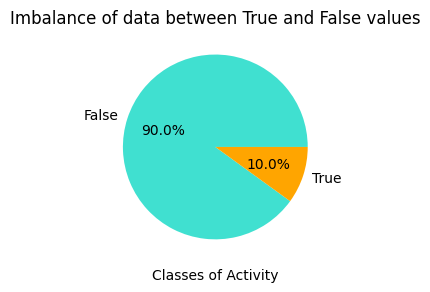

In [41]:
fig, ax = plt.subplots(figsize=(5,3))
true_or_false = main_dataset['Irregular_Activity'].value_counts().reset_index()
labels = ['False', 'True']
ax.pie(true_or_false['count'], labels=labels, colors=['turquoise', 'orange'], autopct='%1.1f%%')
ax.set_xlabel('Classes of Activity')

ax.set_title('Imbalance of data between True and False values')

I will try and test if accuracy is improved if the dataset is more balanced

In [42]:
X = main_dataset[['filtered_x', 'Magnitude', 'minutes', 'by_gse', 'bz_gse']]
y = main_dataset['Irregular_Activity']

Text(0.5, 1.0, 'Imbalance of data between True and False values')

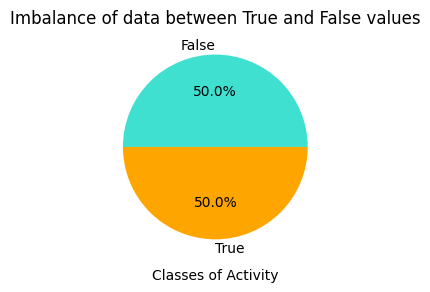

In [43]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy=1)

X_resize, y_resize = under_sampler.fit_resample(X, y)

fig, ax = plt.subplots(figsize=(5,3))
true_or_false = y_resize.value_counts().reset_index()
ax.pie(true_or_false['count'], labels=labels, colors=['turquoise', 'orange'], autopct='%1.1f%%')
ax.set_xlabel('Classes of Activity')

ax.set_title('Imbalance of data between True and False values')

Now that the proportions are the same, we can test the model again

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_resize, y_resize, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight={0:1, 1:8}, random_state=42)
model.fit(X_train_scaled, y_train)

wind_prediction = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, wind_prediction))
print("Classification Report:\n", classification_report(y_test, wind_prediction))

Accuracy: 0.9957706617483385
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00     31363
        True       0.99      1.00      1.00     31531

    accuracy                           1.00     62894
   macro avg       1.00      1.00      1.00     62894
weighted avg       1.00      1.00      1.00     62894



Around the same, so I will save the imbalanced model as it is slightly better

In [45]:
import pickle

with open('model.csv','wb') as f:
    pickle.dump(model_balanced, f)